In [1]:
print("0702 목")

0702 목


In [3]:
# git add 파일혹인 디렉
# git status
# git commit -am "지정이름, 내용"
# git push origin master

In [11]:
import time
import multiprocessing

# multiprocessing.Process는 프로세를 만드는데 활용 할 수있다.
class countDown(multiprocessing.Process):
    def __init__(self, x):
        # 생성자쪽에서 multiprocessing.Process의 생성자를 호출해서
        # 실제 구동가능한 프로세를 만들었다.
        # 해당 프로세스에는  X 값을 입력으로 들어온 값을 설정한다.
        multiprocessing.Process.__init__(self)
        self.x = x
    
    #실제 플로세스가 run()을 사용하면 구동하는 함수
    def run(self):
        while True:
            if self.x == 0:
                break
            print("CD...%d" % self.x)
            self.x -=1
            # sleep(초단위 시간)을 통해서 대기할 수 있음.
            time.sleep(1)
            
p = countDown(3)
# 실제 p에 해당하는 클래스의 run()을 구동한다.
p.start()
            

CD...3
CD...2
CD...1


In [4]:
import time
import multiprocessing

# 프로세스 함수는 메시지를 출력하고
# 일정한 시간 간격으로 동작을 하도록 서포트한다.
def process(message, interval):
    while True:
        print("블라블라 : %s" % message)
        time.sleep(interval)
        
# p1이라는 프로세를 만드는데 
# 이 녀석에게 위에 def process 함수의 일을 시킬 것이다.
# 그리고 파라미터(입력)로는 args = ("p1",1)을 전달할 것이다.
p1 = multiprocessing.Process(target = process, args = ("p1", 1))
p2 = multiprocessing.Process(target = process, args = ("p2", 3))
p3 = multiprocessing.Process(target = process, args = ("p3", 5))
p4 = multiprocessing.Process(target = process, args = ("p4", 2))


p1.start()
p2.start()
p3.start()
p4.start()


cnt = 0

while cnt < 100:
    cnt += 1
    # 메인 쓰레드가(부모 프로세스)
    # 프로세스를 생성할 때는 부모 프로세스가 자식 프로세스를 관리하게 된다.
    # ps -ef 명령으로 볼 때
    # 부모 프로세스들은 모두 공통된 부모 프로세스를 가진다.
    # 자신의 프로세스 ID와 PID, 부모의 프로세스 ID는 PPID
    print("메인 쓰레드 ...")
    time.sleep(1)
    
# ps -ef로 프로세스 리스트를 확인할 수 있고
# 확인된 프로세스중 강종하고 싶은것이 있으면
# kill -9 PID숫자를 통해서 제거


블라블라 : p1
블라블라 : p2
블라블라 : p3
블라블라 : p4
메인 쓰레드 ...
블라블라 : p1
메인 쓰레드 ...
블라블라 : p1
블라블라 : p4
메인 쓰레드 ...
블라블라 : p2
블라블라 : p1
메인 쓰레드 ...
블라블라 : p1
블라블라 : p4
메인 쓰레드 ...
블라블라 : p3
블라블라 : p1
메인 쓰레드 ...
블라블라 : p2
블라블라 : p4
블라블라 : p1
메인 쓰레드 ...
블라블라 : p1
메인 쓰레드 ...
블라블라 : p4
블라블라 : p1
메인 쓰레드 ...
블라블라 : p2
블라블라 : p1
메인 쓰레드 ...
블라블라 : p3
블라블라 : p4
블라블라 : p1
메인 쓰레드 ...
블라블라 : p1
메인 쓰레드 ...
블라블라 : p2
블라블라 : p4
블라블라 : p1
메인 쓰레드 ...
블라블라 : p1
메인 쓰레드 ...
블라블라 : p4
블라블라 : p1
메인 쓰레드 ...
블라블라 : p3
블라블라 : p2
블라블라 : p1
메인 쓰레드 ...
블라블라 : p4
블라블라 : p1
메인 쓰레드 ...
블라블라 : p1
메인 쓰레드 ...


Process Process-44:
Process Process-42:
Process Process-41:
Process Process-43:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-4-31fa49d66911>", line 9, in process
    time.sleep(interval)
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/bitai/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run


KeyboardInterrupt: 

In [16]:
import time
from multiprocessing import Pool

def f(x):
    return x * x

# 프로세스들의 집합 장소를 만들어서 4개를 수용할 수 있도록 하였다.
pool = Pool(processes = 4)



# 이때 작업 전체는 비동기 처리가 이루어진다.
# pool.apply_async()가 비동기 처리 작업을 지원한다.

res = pool.apply_async(f, (10, ))
# 1초안에 처리하지 못하면 에러!
# 처리를 한다면 결과를 출력한다.
print(res.get(timeout = 1))

# 위에 def f라는 기능을 10번 작업하도록 한다.
print(pool.map(f, range(10)))
it = pool.imap(f, range(10))

print(it.next())
print(it.next())
print(it.next(timeout = 2))

res = pool.apply_async(time.sleep, (10, ))
print(res.get(timeout = 60))
print("pass")
# 10초간 슬립을 하는데 대기 시간은 3초이므로 에러가 발생!
res = pool.apply_async(time.sleep, (10, ))
print(res.get(timeout = 3))

100
[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]
0
1
4
None
pass


TimeoutError: 

In [5]:
import multiprocessing as mp

def withdraw(money):
    for _ in range(20000):
        money.value -= 1
    
def deposit(money):
    for _ in range(20000):
        money.value += 1
        
def perform_process():
    # money는 크리티컬 섹션이 되었다.
    money = mp.Value('i', 20000)
    
    p1 = mp.Process(target = withdraw, args = (money, ))
    p2 = mp.Process(target = deposit, args = (money, ))
    
    p1.start()
    p2.start()
    
    p1.join()
    p2.join()
    
    print("Final Money = {}".format(money.value))
    
for _ in range(10):
    perform_process()

Final Money = 19027
Final Money = 20691
Final Money = 27022
Final Money = 14778
Final Money = 17320
Final Money = 24299
Final Money = 19613
Final Money = 24434
Final Money = 16982
Final Money = 17073


In [3]:
import multiprocessing as mp

# p1 프로세스의 작업 - 0.000000001
def withdraw(money, lock):
    for _ in range(20000):
        # 자물쇠를 채운다(lock.acquire()).
        # 자물쇠를 채웠으므로 아무도 여기에는 이제 들어오지 못한다.
        # 들어오지 못하는 영역이 결국 크리티컬 섹션이다.
        # 만약 자물쇠(락)가 채워진 상태에서 다른 녀석이
        # 자물쇠(락)을 얻으려고 하면 접근하지 못하게 된다.
        # (락이 풀릴때 까지 - lock.release())
        lock.acquire()
        money.value -= 1
        lock.release()
    
# p2 프로세스의 작업 - 0.000000007
def deposit(money, lock):
    for _ in range(20000):
        lock.acquire()
        money.value += 1
        lock.release()
        
def perform_process():
    # money는 크리티컬 섹션이 되었다.
    money = mp.Value('i', 20000)
    # 크리티컬 섹션을 보호해주기 위한 락을 추가했다.
    # 락을 남발하면 오히려 성능을 저하시킬 수 있다.
    # 그러나 크리티컬 섹션에 대한 보호를 수행하는데 락을 반드시 사용해야 한다.
    lock = mp.Lock()
    
    p1 = mp.Process(target = withdraw, args = (money, lock, ))
    p2 = mp.Process(target = deposit, args = (money, lock, ))
    
    p1.start()
    p2.start()
    
    p1.join()
    p2.join()
    
    print("Final Money = {}".format(money.value))
    
for _ in range(10):
    perform_process()

Final Money = 20000
Final Money = 20000
Final Money = 20000
Final Money = 20000
Final Money = 20000
Final Money = 20000
Final Money = 20000
Final Money = 20000
Final Money = 20000
Final Money = 20000


In [6]:
# cpu는 한번에 한가지일만 한다!

# 크리티컬섹션 >> 락을걸어줌으로써 크리티컬 섹션이 보호된다
# 데이터의 무결성이 보장되냐 안되냐..

# 성능은 떨어지지만 데이터의 안전성이 보장된다.

# 크리티컬섹션을 보호할때 사용하는 섹션이 보통 2가지가 있다.
# 1. spimlock vs semaphore

# [spimlock] -> 단순한 작업
# while 루프, 폴링

# [semaphore] -> context switching / 복잡한 작업.
# 비동기 처리 ex) 카톡 / 전화 : 동기처리

In [11]:
import time
import threading

# threading.THread를 상속받아
# DummyTread를 기본적인 THread 구조로 만들었다.
# 여기서 run만 구현해주면 바로 스레드를 활용할 수 있게 된다.
# run에는 스레드가 작업할 내용을 작성해주면 된다.
class DummyTread(threading.Thread):
    def run(self):
        # time.ctime()은 생성시간
        now = time.ctime()
        # self.ident는 Thread 자체의 ID값을 나타낸다.
        print(
            "[time:%s][tid:%d] Thread! \n" % (now,self.ident)
        )
        time.sleep(30)
# 스레드를 전체 총괄하는 메인 쓰레드가 있고
# 그리고 MAIN THREAD의 통제를 받는 12개의 별도 Thread가 존재하는 것
# 그래서 ps -eLf로 살펴봤을때 main Thread
        
for _ in range(12):   
    t = DummyTread()
    t.start()
    

[time:Thu Jul  2 15:00:02 2020][tid:140042142201600] Thread! 

[time:Thu Jul  2 15:00:02 2020][tid:140041561040640] Thread! 

[time:Thu Jul  2 15:00:02 2020][tid:140042150594304] Thread! 

[time:Thu Jul  2 15:00:02 2020][tid:140041552647936] Thread! 

[time:Thu Jul  2 15:00:02 2020][tid:140042167379712] Thread! 

[time:Thu Jul  2 15:00:02 2020][tid:140042158987008] Thread! 

[time:Thu Jul  2 15:00:02 2020][tid:140042133808896] Thread! 

[time:Thu Jul  2 15:00:02 2020][tid:140042125416192] Thread! 

[time:Thu Jul  2 15:00:02 2020][tid:140042117023488] Thread! 
[time:Thu Jul  2 15:00:02 2020][tid:140041569433344] Thread! 


[time:Thu Jul  2 15:00:02 2020][tid:140041544255232] Thread! 

[time:Thu Jul  2 15:00:02 2020][tid:140041535862528] Thread! 



In [12]:
# Thread는 Process와 다른점이 하나 있다.
# Thread는 기본적으로 Data영역을 공유한다.
# Process는 기본적으로 Data영역이 분리되어 있음.


In [24]:
import threading

# 전역 변수는 Data 영역에 배치된다.
x = 0

def increment_global():
    global x
    x += 1
        
def taskOfThread():
    for _ in range(10000):
        increment_global()
        
def thread_main():
    global x
    x = 0
    
    # 두개의 스레드를 만들었다.
    # 두개의 스레드fmf taskOfThread라는 함수를 구동시킨다.
    t1 = threading.Thread(target = taskOfThread)
    t2 = threading.Thread(target = taskOfThread)
    
    t1.start()
    t2.start()
    
    t1.join()
    t2.join()
    
# Thread가 전역변수의 내용을
# 별도의 작업 없이도 공유할 수 있음을 확인하는 부분이다.
for i in range(10):
    thread_main()
    print("x = {1} after Iteration {0}".format(i, x))

x = 20000 after Iteration 0
x = 20000 after Iteration 1
x = 20000 after Iteration 2
x = 20000 after Iteration 3
x = 20000 after Iteration 4
x = 20000 after Iteration 5
x = 20000 after Iteration 6
x = 20000 after Iteration 7
x = 20000 after Iteration 8
x = 20000 after Iteration 9


In [25]:
import threading

# 전역 변수는 Data 영역에 배치된다.
lock = threading.Lock()
x = 0

def increment_global():
    global x
    x += 1
        
def taskOfThread():
    for _ in range(100000):
        lock.acquire()
        increment_global()
        lock.release()
        
def thread_main():
    global x
    x = 0
    
    
    # 두개의 스레드를 만들었다.
    # 두개의 스레드fmf taskOfThread라는 함수를 구동시킨다.
    t1 = threading.Thread(target = taskOfThread)
    t2 = threading.Thread(target = taskOfThread)
    
    t1.start()
    t2.start()
    
    t1.join()
    t2.join()
    
# Thread가 전역변수의 내용을
# 별도의 작업 없이도 공유할 수 있음을 확인하는 부분이다.
for i in range(10):
    thread_main()
    print("x = {1} after Iteration {0}".format(i, x))

x = 200000 after Iteration 0
x = 200000 after Iteration 1
x = 200000 after Iteration 2
x = 200000 after Iteration 3
x = 200000 after Iteration 4
x = 200000 after Iteration 5
x = 200000 after Iteration 6
x = 200000 after Iteration 7
x = 200000 after Iteration 8
x = 200000 after Iteration 9


In [28]:
def square2(x):
    return x * x

myList = [1, 2, 3, 4, 5]
res = [1]

for num in myList:
    res.append(square(num))

In [38]:
import os
import multiprocessing

def square(n):
    print("워커 프로세스 이스 포 {0}: {1}".format(n, os.getpid()))
    return n * n

p = multiprocessing.Pool()
res = p.map(square, myList)

print(res)

워커 프로세스 이스 포 2: 18262
워커 프로세스 이스 포 4: 18264
워커 프로세스 이스 포 1: 18261
워커 프로세스 이스 포 3: 18263
워커 프로세스 이스 포 5: 18265
[1, 4, 9, 16, 25]


In [3]:
import threading
import time
import logging

logging.basicConfig(level=logging.DEBUG,
                    format='(%(threadName)-9s) %(message)s',)

class ThreadPool(object):
    def __init__(self):
        super(ThreadPool, self).__init__()
        self.active = []
        self.lock = threading.Lock()
        
    def makeActive(self, name):
        with self.lock:
            # 실제 연산 자리!!!
            self.active.append(name)

            time.sleep(5)
            logging.debug('Running: %s', self.active)
    def makeInactive(self, name):
        print('makeInactive')
        with self.lock:
            self.active.remove(name)
            logging.debug('Running: %s', self.active)

def f(s, pool):
    logging.debug('Waiting to join the pool')
    with s:
        name = threading.currentThread().getName()
        pool.makeActive(name)
        time.sleep(1)
        pool.makeInactive(name)

# 여러개의 스레드를 수용할 수 있는 pool을 만든다.
pool = ThreadPool()
# 최대 3개까지 사용할 수 있는 세마퐁어를 만든다.
s = threading.Semaphore(3)
# 총10개의 스레드를 만들어
for i in range(10):
    t = threading.Thread(target=f, name='thread_'+str(i), args=(s, pool))
    t.start()

(thread_0 ) Waiting to join the pool
(thread_1 ) Waiting to join the pool
(thread_2 ) Waiting to join the pool
(thread_3 ) Waiting to join the pool
(thread_4 ) Waiting to join the pool
(thread_5 ) Waiting to join the pool
(thread_6 ) Waiting to join the pool
(thread_7 ) Waiting to join the pool
(thread_8 ) Waiting to join the pool
(thread_9 ) Waiting to join the pool
(thread_9 ) Running: ['thread_8', 'thread_9']
(thread_8 ) Running: ['thread_9']
(thread_9 ) Running: []


In [5]:
# y = x^2에 대해 0 ~ 3까지의 적분을 구현해보자!
# 1. dx = 0.001(고정 - 무한소로 가정)
# 2. x값의 이동을 기록하도록 한다.
# 3. y는 현재의 x값에 따라서 변한다.
# 4. dx * y로 사각형 넓이 값을 구한다.
# 5. 구한 모든 사각형들의 넓이를 합한다.
# y = x^2을 적분하면 1/3x^3 + C
# 0 ~ 3까지의 정적분은 9에 근접한 값이 나온다.
# dx가 작으면 작을수록 정밀도가 높아진다.
# dx가 작으면 작을수록 계산량이 많아진다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [7]:
sampleData1 = np.array(
    [
        [166, 58.7], [176.0, 75.7],
        [171.0, 90.1], [169.0, 60.1], [169.0, 60.1]
    ]
)

print(sampleData1)

[[166.   58.7]
 [176.   75.7]
 [171.   90.1]
 [169.   60.1]
 [169.   60.1]]


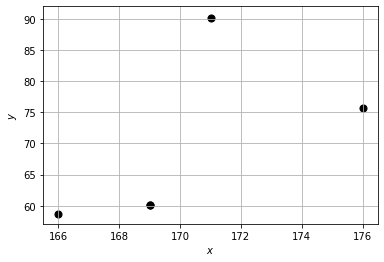

In [11]:
for point in sampleData1:
    plt.scatter(point[0], point[1],c='k', s=50)
    
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

In [12]:
value = np.arange(10)
value2 = np.arange(5, 15)
value3 = np.arange(1, 100, 2)

print(value)
print(value2)
print(value3)

[0 1 2 3 4 5 6 7 8 9]
[ 5  6  7  8  9 10 11 12 13 14]
[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47
 49 51 53 55 57 59 61 63 65 67 69 71 73 75 77 79 81 83 85 87 89 91 93 95
 97 99]


In [13]:
dx = 0.0000001
start = 0.0
end = 3.0

loopLen = (end - start) / dx
print(loopLen)

x = 0
y = 0
area = 0

for i in range(int(loopLen)):
    # print(i)
    # x의 위치에 따른 y의 높이값을 계산하는 부분
    y = x ** 2
    # dx는 고정값인데
    # 실제로 x는 위치를 이동하면서 y값을 갱신해줘야함
    # 사각형을 만들기 위해서 밑변인 dx만큼 이동을 시킨다.
    x += dx
    # 사각형 넓이의 합을 구한다.
    area += dx * y
    
print("0 ~ 3까지 적분 결과는 = " + str(area))

30000000.0
0 ~ 3까지 적분 결과는 = 8.999999547431766


In [20]:
import numpy as np

dx = 0.1
x = np.arange(0, 3, dx)
# print(x)

def integralRange(start, end):
    curX = np.arange(start, end, dx)
    Y = curX ** 2
    eachBlock = dx * Y
    area = np.sum(eachBlock)
    return area
    
print("y = x^2에 대한 0 ~ 3까지의 정적분 결과는=", integralRange(0,3))

y = x^2에 대한 0 ~3까지의 정적분 결과는= 8.555000000000003
